# SHAP-IQ with scikit-learn

In this example, we use the popular California housing dataset for regression available at https://www.kaggle.com/datasets/camnugent/california-housing-prices.

### Import Packages

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import shapiq

{"shapiq": shapiq.__version__}

'1.2.3.9000'

### Load Data
Let's load the California housing dataset and split it into training and test sets.

In [2]:
X, y = shapiq.load_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    X.values,
    y.values,
    test_size=0.25,
    random_state=42,
)
n_features = X_train.shape[1]

### Train a Model with Scikit-learn
Here we train a random forest regressor with 500 trees.
The model achieves a relatively high R2 score on the test set.

In [3]:
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=n_features,
    max_features=2 / 3,
    max_samples=2 / 3,
    random_state=42,
)
model.fit(X_train, y_train)
print(f"Train R2: {model.score(X_train, y_train):.4f}")
print(f"Test  R2: {model.score(X_test, y_test):.4f}")

Train R2: 0.7990
Test  R2: 0.7462


### Model-Agnostic Explainer

We use `shapiq.TabularExplainer` to explain any machine learning model for tabular data. 

It has the following basic parameters:

- `model`: The model to be explained as a callable function expecting data points as input and returning 1-dimensional predictions.

- `data`: A background dataset to be used for imputation.

In [4]:
explainer_tabular = shapiq.TabularExplainer(model=model, data=X_train, index="SII", max_order=2)

Next, select an instance to be explained.

In [5]:
x = X_test[24]

Call an `explain()` interface setting the `budget`, i.e. the maximum number of model evaluations (coallitions).

In [6]:
interaction_values = explainer_tabular.explain(x, budget=2**n_features, random_state=0)
interaction_values

InteractionValues(
    index=SII, max_order=2, min_order=0, estimated=False, estimation_budget=256,
    n_players=8, baseline_value=2.0699756848160713
)

An output is stored in the `shapiq.InteractionValues` object. Its main attribute is `dict_values` storing Shapley interaction values as a dictionary.

In [7]:
interaction_values.dict_values

{(): 0.0,
 (0,): -0.0025053280629729366,
 (1,): -0.059059781233210755,
 (2,): -0.04094116066200977,
 (3,): 0.01076880575047387,
 (4,): 0.019089905055516495,
 (5,): -0.1257371373103636,
 (6,): 0.14633438507664992,
 (7,): -0.25554218824387515,
 (0, 1): -0.05373403683489192,
 (0, 2): 0.03667440225952373,
 (0, 3): -0.015109422439691694,
 (0, 4): -0.01848326617427066,
 (0, 5): -0.08461240953632981,
 (0, 6): -0.055193636691979936,
 (0, 7): 0.014937070476505814,
 (1, 2): -0.019009773394365475,
 (1, 3): -0.01702989548224437,
 (1, 4): -0.017828342783794894,
 (1, 5): 0.09181470828207348,
 (1, 6): -0.021100890069847063,
 (1, 7): -0.021097690884632307,
 (2, 3): -0.018509549993237947,
 (2, 4): -0.01783138647135494,
 (2, 5): -0.01860519542007948,
 (2, 6): -0.01160086247368286,
 (2, 7): -0.02439208463186512,
 (3, 4): -0.017626552127041225,
 (3, 5): -0.013350839466996743,
 (3, 6): -0.019050293357095738,
 (3, 7): -0.018692968467706777,
 (4, 5): -0.024309562943583437,
 (4, 6): -0.018280169642071808,
 (4

One can retrieve only 2-order values with `get_n_order(2)` (object) and `get_n_order_values(2)` (values themselves).

In [8]:
interaction_values.get_n_order(2).dict_values

{(0, 1): -0.05373403683489192,
 (0, 2): 0.03667440225952373,
 (0, 3): -0.015109422439691694,
 (0, 4): -0.01848326617427066,
 (0, 5): -0.08461240953632981,
 (0, 6): -0.055193636691979936,
 (0, 7): 0.014937070476505814,
 (1, 2): -0.019009773394365475,
 (1, 3): -0.01702989548224437,
 (1, 4): -0.017828342783794894,
 (1, 5): 0.09181470828207348,
 (1, 6): -0.021100890069847063,
 (1, 7): -0.021097690884632307,
 (2, 3): -0.018509549993237947,
 (2, 4): -0.01783138647135494,
 (2, 5): -0.01860519542007948,
 (2, 6): -0.01160086247368286,
 (2, 7): -0.02439208463186512,
 (3, 4): -0.017626552127041225,
 (3, 5): -0.013350839466996743,
 (3, 6): -0.019050293357095738,
 (3, 7): -0.018692968467706777,
 (4, 5): -0.024309562943583437,
 (4, 6): -0.018280169642071808,
 (4, 7): -0.017340911510522337,
 (5, 6): -0.02348711782040349,
 (5, 7): 0.012436043011738446,
 (6, 7): -0.04634443532988916}

In [9]:
interaction_values.get_n_order_values(2)

array([[ 0.        , -0.05373404,  0.0366744 , -0.01510942, -0.01848327,
        -0.08461241, -0.05519364,  0.01493707],
       [-0.05373404,  0.        , -0.01900977, -0.0170299 , -0.01782834,
         0.09181471, -0.02110089, -0.02109769],
       [ 0.0366744 , -0.01900977,  0.        , -0.01850955, -0.01783139,
        -0.0186052 , -0.01160086, -0.02439208],
       [-0.01510942, -0.0170299 , -0.01850955,  0.        , -0.01762655,
        -0.01335084, -0.01905029, -0.01869297],
       [-0.01848327, -0.01782834, -0.01783139, -0.01762655,  0.        ,
        -0.02430956, -0.01828017, -0.01734091],
       [-0.08461241,  0.09181471, -0.0186052 , -0.01335084, -0.02430956,
         0.        , -0.02348712,  0.01243604],
       [-0.05519364, -0.02110089, -0.01160086, -0.01905029, -0.01828017,
        -0.02348712,  0.        , -0.04634444],
       [ 0.01493707, -0.02109769, -0.02439208, -0.01869297, -0.01734091,
         0.01243604, -0.04634444,  0.        ]])

### Visualization of Shapley interactions

`shapiq` includes the following plotting functions:

- [network_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.network_plot)

- [stacked_bar_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.stacked_bar_plot)

- [force_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.force_plot)

- and [bar_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.bar_plot) for global feature (interaction) importance.

For details of their parameters, refer to the [API reference](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html).

(<Figure size 600x600 with 1 Axes>, <Axes: >)

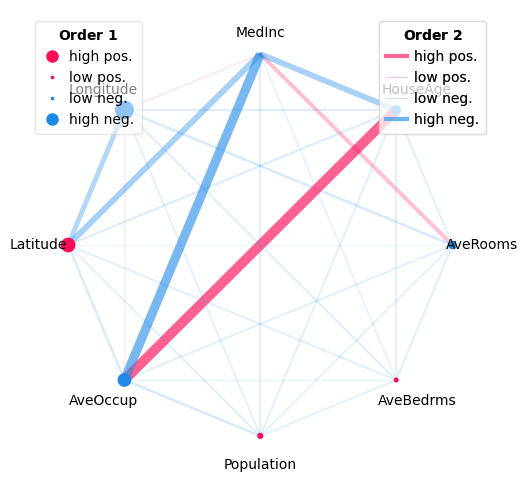

In [10]:
shapiq.network_plot(
    first_order_values=interaction_values.get_n_order_values(1),
    second_order_values=interaction_values.get_n_order_values(2),
    feature_names=X.columns,
)

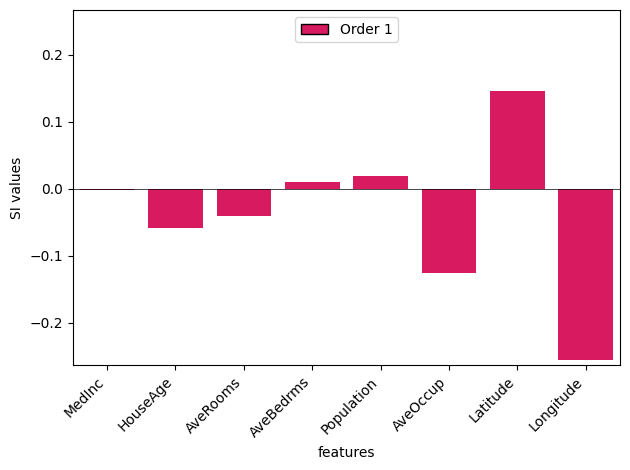

In [11]:
_ = shapiq.stacked_bar_plot(
    interaction_values.get_n_order(1),
    feature_names=X.columns,
)

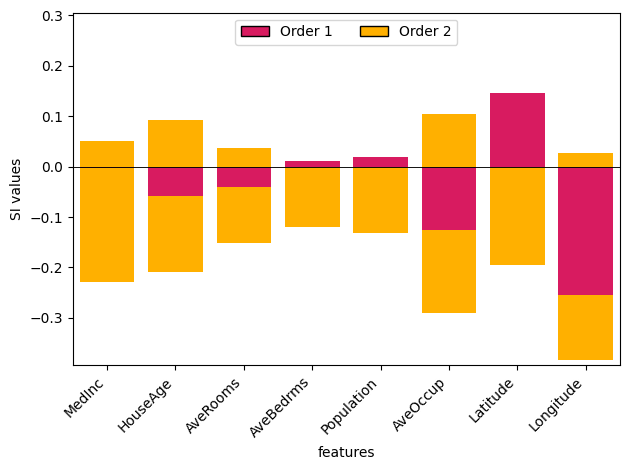

In [12]:
_ = shapiq.stacked_bar_plot(
    interaction_values=interaction_values,
    feature_names=X.columns,
)

After installing the `shap` Python package.

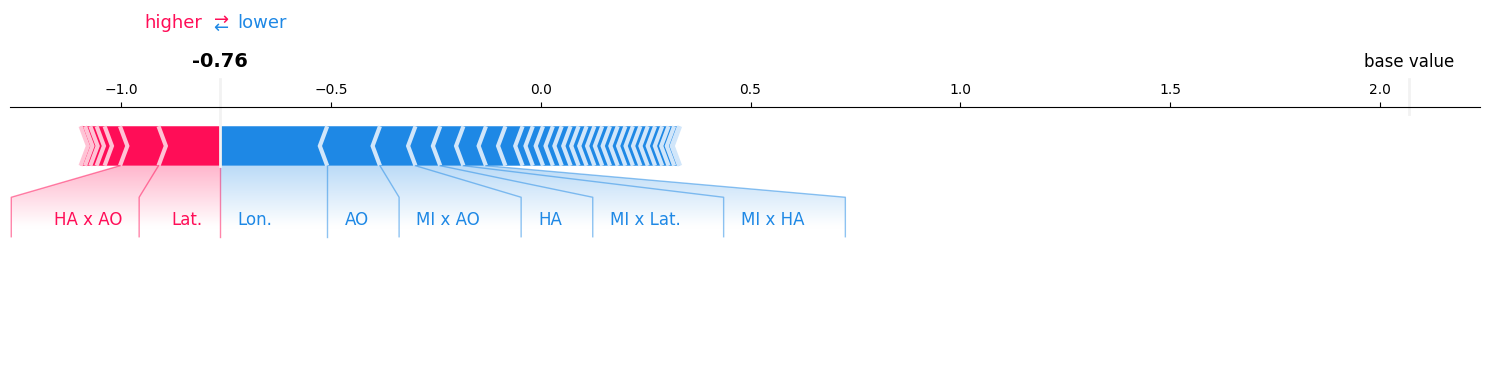

In [13]:
interaction_values.plot_force(feature_names=X.columns)